# 클로젯 셰어 EDA

### 용어 및 칼럼 설명
<br>

- brandnm : 아이템 브랜드 명
- goodsnm : 아이템 명
- USER : 개별 유저 식별 값
- reg_date : 개별 유저 가입일
- order_date : 아이템 주문일
- p_type : 주문 상품 종류
    - 7days / 4days
- sub_types : 주문 상품 카테고리
    - BA : 가방 / O : 아우터 / D : 드레스 / T : 상의 / B : 하의 / TP : 투피스 
- app_yn : 어플리케이션 사용 여부
    - Y : 어플리케이션 사용 / NULL(공백)

## 주제
1. 구매 소요 시간 분석
    - 가입일로부터 구매일 까지 전환된 소요시간 분석
    - 최근 3개월 전체, 각 월 별 (1,2,3)
    - 분기경향 / 월 별 변동사항 추세 분석 -> 가입일 이내 전환한 유저가 상승했다~ 이런식
2. 구매 상품 트렌드 분석
- 유저당 주문 수량    
    - 최근 3개월 전체, 월 별 따로
    - 분기 경향... (시계열) + 월별 변동사항
- 주문 아이템 분석
    - 브랜드 별 선호도, 아이템 카테고리 별 선호도
    - 신규 유저들 구매 트렌드! *
3. 분석 내용 토대로 인사이트
- 분석 내용 도식화 
    - 시각화 (할 수 있는거 다해, 절 대 다 해)
    - 유사성을 갖는 결과에 대해 그룹화 (상관관계 + groupby)
- 인사이트
    - 팀 회의 필


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'  # 한글 출력을 위한 글꼴 설정
plt.rcParams['axes.unicode_minus'] = False    # 문자 - (마이너스) 정상 출력을 위한 코드

#실수 설정 옵션 (소수 둘째 짜리까지)
pd.options.display.float_format = '{:.2f}'.format

# 데이터 셋

In [2]:
df_closet=pd.read_excel('C:/Users/82102/jupi python/프리온보딩/기술과제 제출/클로젯셰어_과제DB 대체 자료.xlsx')

In [3]:
df_closet.head()

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn
0,Gucci,flower dionysus shoulder bag beige,a161237,2019-12-06,2021-01-15,7days,BA,Y
1,El estilo de Claire,beads cropped jacket black,a1140859,2021-01-02,2021-01-15,4days,O,NaN
2,Danha,embroidery point oriental mini skirt blue,a1140859,2021-01-02,2021-01-15,4days,B,NaN
3,Danha,graphics pattern top pink,a1140859,2021-01-02,2021-01-15,4days,T,NaN
4,Burberry London,buckle basic pattern zipup-jumper navy,a1140740,2021-01-01,2021-01-15,7days,O,Y


In [4]:
df_closet.describe()

C:\Users\82102\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.
C:\Users\82102\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn
count,1442,1471,1471,1466,1471,1471,1471,1295
unique,245,979,1234,368,90,2,6,1
top,Gucci,chevron quilted cross bag black,a1149461,2021-03-16 00:00:00,2021-03-24 00:00:00,4days,BA,Y
freq,232,23,11,44,47,894,692,1295
first,NaN,NaN,NaN,2017-06-24 00:00:00,2021-01-01 00:00:00,NaN,NaN,NaN
last,NaN,NaN,NaN,2021-03-31 00:00:00,2021-03-31 00:00:00,NaN,NaN,NaN


In [5]:
df_closet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1471 entries, 0 to 1470
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   brandnm     1442 non-null   object        
 1   goodsnm     1471 non-null   object        
 2   USER        1471 non-null   object        
 3   reg_date    1466 non-null   datetime64[ns]
 4   order_date  1471 non-null   datetime64[ns]
 5   p_type      1471 non-null   object        
 6   sub_type    1471 non-null   object        
 7   app_yn      1295 non-null   object        
dtypes: datetime64[ns](2), object(6)
memory usage: 92.1+ KB


- 결측값이 존재, 확인하자
- app_yn은 결측값이 앱이 없다는 표시이니 N 으로 채워 넣자

### 결측치 보간

In [6]:
#app_yn n 채우자
df_closet["app_yn"].fillna('N', inplace = True)
df_closet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1471 entries, 0 to 1470
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   brandnm     1442 non-null   object        
 1   goodsnm     1471 non-null   object        
 2   USER        1471 non-null   object        
 3   reg_date    1466 non-null   datetime64[ns]
 4   order_date  1471 non-null   datetime64[ns]
 5   p_type      1471 non-null   object        
 6   sub_type    1471 non-null   object        
 7   app_yn      1471 non-null   object        
dtypes: datetime64[ns](2), object(6)
memory usage: 92.1+ KB


In [7]:
# brandnm, reg_date 결측치 확인
brandnm_nl=df_closet.loc[df_closet['brandnm'].isnull()]
reg_date_nl = df_closet.loc[df_closet['reg_date'].isnull()]

In [8]:
# reg_date 결측치
# 유저, 브랜드, 다른 피쳐가 거의 다르다 
reg_date_nl

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn
265,Gucci,mamont chain bag red,a1144008,NaT,2021-01-21,7days,BA,Y
351,Lanvin,banding point jumper skyblue,a1142855,NaT,2021-01-18,7days,O,N
564,Gucci,leather point cross bag,a1146490,NaT,2021-02-18,4days,BA,Y
746,Fendi,monogram zucchino shoulder bag,a1145478,NaT,2021-02-04,4days,BA,N
1254,Fendi,back to school bag 1,a1149094,NaT,2021-03-12,7days,BA,Y


In [10]:
df_closet[df_closet['sub_type'] =='TP'] #TP들만 결측값이 존재!

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn
146,NaN,feminine military blouse & high waist wide slacks,a1144948,2021-01-30,2021-01-30,4days,TP,Y
147,NaN,button basic pattern doublebreasted-jacket sky...,a170041,2020-01-01,2021-01-30,4days,TP,Y
160,NaN,lace point shirring blouse pink & lace detail ...,a1141009,2021-01-04,2021-01-28,4days,TP,Y
220,NaN,printing pattern hoodie grey & pocket basic pa...,a1144470,2021-01-25,2021-01-26,4days,TP,Y
267,NaN,button basic pattern jacket black & pocket bas...,a121913,2019-05-05,2021-01-21,4days,TP,Y
282,NaN,buckle shirt & embroidery lace skirt charcoal,a1132297,2020-11-22,2021-01-21,7days,TP,Y
285,NaN,button tweed pattern doublebreasted-coat multi...,a1127979,2020-10-31,2021-01-21,7days,TP,Y
329,NaN,long sleeve rib t-shirt & check pattern square...,a1134915,2020-12-03,2021-01-19,7days,TP,N
342,NaN,cutout neck knit & color pleats belt skirt,a1141257,2021-01-05,2021-01-19,4days,TP,Y
368,NaN,El estilo de Claire - neoprene botanical print...,a1107090,2020-07-03,2021-01-17,4days,TP,Y


In [11]:
#결측값 정리 파일
df_tp=pd.read_csv('TP.csv')

In [12]:
df_tp= df_tp.rename(columns={
    '브랜드 결측값 브랜드 후보':'brandnm'
})

In [13]:
df_tp_dict=df_tp.to_dict()

In [14]:
#결측값 보간
for i in  list(df_tp_dict.values()):
    df_closet['brandnm'] = df_closet['brandnm'].fillna(i)

In [19]:
# # df['Workclass'].apply(lambda x: np.nan if x == '?' else x)
# df_closet['brandnm']=df_closet['brandnm'].apply(lambda x : np.nan if x =='NULL' else x)
# df_closet.iloc[993][0] = np.nan
# df_closet.iloc[1160][0] = np.nan
# df_closet.iloc[1160][0]
df_closet.replace(' ', np.nan, inplace = True)


In [20]:
df_closet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1471 entries, 0 to 1470
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   brandnm     1469 non-null   object        
 1   goodsnm     1471 non-null   object        
 2   USER        1471 non-null   object        
 3   reg_date    1466 non-null   datetime64[ns]
 4   order_date  1471 non-null   datetime64[ns]
 5   p_type      1471 non-null   object        
 6   sub_type    1471 non-null   object        
 7   app_yn      1471 non-null   object        
dtypes: datetime64[ns](2), object(6)
memory usage: 92.1+ KB


### 브랜드 확인

In [21]:
df_closet['brandnm'].value_counts().count()

272

In [24]:
df_closet['brandnm'].unique()

array(['Gucci', 'El estilo de Claire', 'Danha', 'Burberry London',
       'Prada', 'Max Mara', 'Molliolli', 'Sandro', 'Louis Vuitton',
       'Tory Burch', 'Chloe', 'Time', 'The Izzat', 'Mojosphine',
       'Ted Baker', '& Other Stories', 'Fendi', 'Balmain', 'Celine',
       'Burberry', 'Chanel', 'Dior', 'Bottega Veneta', 'Plastic Island',
       'Reneevon', 'Sorry Too Much Love', 'Saint Laurent', 'Miu Miu',
       'Yves Saint Laurent', 'Zooc', 'Vivienne Westwood',
       'Maison Kitsune', 'Margarin fingers', 'The Tint', 'Love Moschino',
       'Michaa', 'Vivienne Westwood Red Label', 'MSGM', 'Christian Dior',
       'It michaa', 'SJSJ', 'Amsale', 'Imvely', 'Chi Chi London', 'Maje',
       'Biker Starlet', 'Thom Browne', 'Jill By Jill Stuart',
       'Comme des Garcons', 'Nain', 'Dolce & Gabbana', 'Givenchy',
       'Salvatore Ferragamo', 'Andersen-Andersen', 'A.P.C.',
       'Self-portrait', 'Sonia Rykiel', 'Diane von Furstenberg',
       'Hugo Boss', 'Baum Und Pferdgarten', 'BCBG', '

In [58]:
df_closet['brandnm'].value_counts().sort_values(ascending = False).head(30)
                                                          

Gucci                  232
Chanel                  90
Saint Laurent           86
Louis Vuitton           79
Prada                   58
Burberry                53
Yves Saint Laurent      38
Thom Browne             33
Fendi                   29
Celine                  28
Sandro                  24
Max Mara                24
Christian Dior          22
Dolce & Gabbana         18
It michaa               16
El estilo de Claire     16
Miu Miu                 15
Jill Stuart             14
Chloe                   14
Vivienne Westwood       14
Michaa                  13
Maje                    12
Burberry London         11
Lucky Chouette          10
Balmain                 10
Mojosphine              10
Dior                    10
Valentino                9
Balenciaga               9
Bottega Veneta           9
Name: brandnm, dtype: int64

<AxesSubplot:>

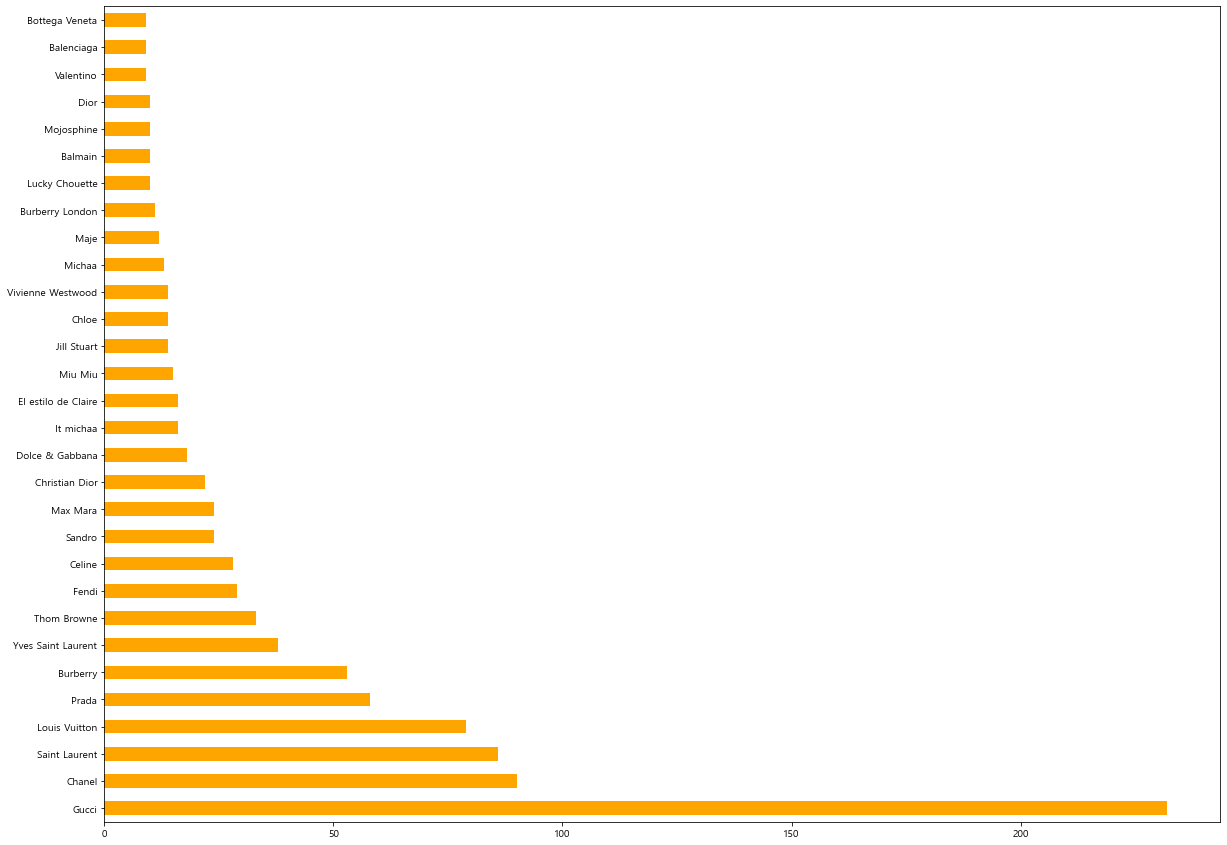

In [47]:
f, axs = plt.subplots(1,1, figsize = (20,15))
df_closet['brandnm'].value_counts().sort_values(ascending = False)[:30].plot(kind = 'barh',
                                                                            color = ['Orange'])


- 압도적인 gucci
- 회의 후 아이템에 대해 고민


## app_yn
- 그래프로 그리기 쉽게 숫자형으로 변환해주자 #cat.codes

In [79]:
df_closet['app_yn'].astype('category')
# 1 = yes , 0 = no

0       Y
1       N
2       N
3       N
4       Y
       ..
1466    Y
1467    Y
1468    Y
1469    Y
1470    Y
Name: app_yn, Length: 1471, dtype: category
Categories (2, object): ['N', 'Y']

C:\Users\82102\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


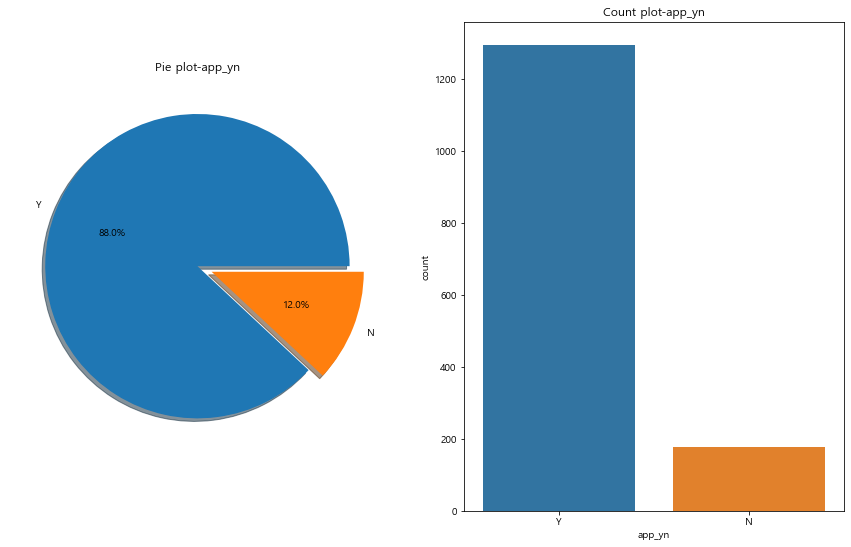

In [87]:
f, ax = plt.subplots(1,2, figsize = (15,9))


df_closet['app_yn'].value_counts().plot.pie(explode = [0,0.1],autopct = '%1.1f%%',
        ax = ax[0], shadow = True)
ax[0].set_title('Pie plot-app_yn')
ax[0].set_ylabel('')
sns.countplot('app_yn', data = df_closet, ax = ax[1])
ax[1].set_title('Count plot-app_yn')

plt.show()

In [91]:
df_closet[['app_yn', 'sub_type']].groupby(['app_yn'], as_index = True).count()

,sub_type
app_yn,
N,176
Y,1295


- 구매자의 88%가 앱을 사용한다 
- 나머지 12%는 웹으로 구매를 하는듯!

## sub_type

In [89]:
df_closet['sub_type'].astype('category')

0       BA
1        O
2        B
3        T
4        O
        ..
1466    BA
1467    BA
1468     T
1469     T
1470     O
Name: sub_type, Length: 1471, dtype: category
Categories (6, object): ['B', 'BA', 'D', 'O', 'T', 'TP']

C:\Users\82102\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


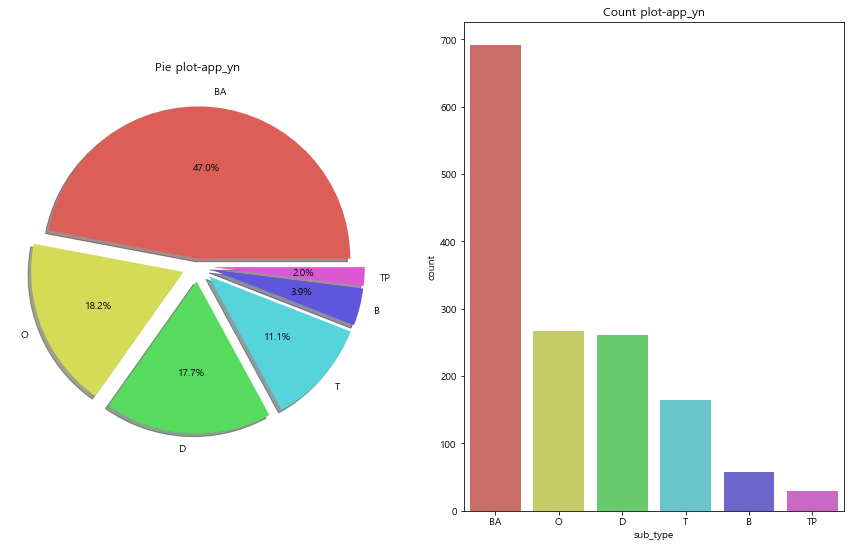

In [145]:
f, ax = plt.subplots(1,2, figsize = (15,9))
colors = sns.color_palette('hls')

df_closet['sub_type'].value_counts().plot.pie(explode = (0.05,0.1,0.1,0.1,0.1,0.1),autopct = '%1.1f%%',
        ax = ax[0], shadow = True, colors =colors)
ax[0].set_title('Pie plot-app_yn')
ax[0].set_ylabel('')
sns.countplot('sub_type', data = df_closet, ax = ax[1], palette="hls" ,
              order = df_closet['sub_type'].value_counts().index)
ax[1].set_title('Count plot-app_yn')

plt.show()

In [104]:
#sub_type, app_yn 교차표
pd.crosstab(df_closet['app_yn'], 
            df_closet['sub_type'], margins=True).style.background_gradient(cmap ='Blues')

sub_type,B,BA,D,O,T,TP,All
app_yn,,,,,,,
N,17,62,42,27,22,6,176
Y,41,630,219,240,142,23,1295
All,58,692,261,267,164,29,1471


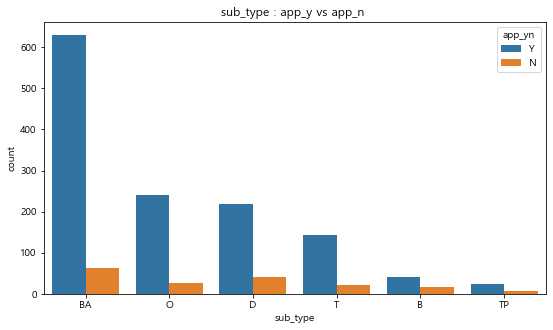

In [162]:
#sub_type, app_yn 교차 시각화
plt.figure(figsize=(9,5))
sns.countplot(x='sub_type',hue = 'app_yn', data =df_closet,
             order = df_closet['sub_type'].value_counts().index)
plt.title('sub_type : app_y vs app_n ')
plt.show()

- 압도적인 BA
- BA, O, D, T 순
- 앱이 있고 없고 BA가 1순위 
- 다만 앱이 없는 사람은 2순위와 3순위가 D, O 순이다

## P_TYPE
- 주문상품 종류 (7/ 4)

In [140]:
df_closet['p_type'].astype('category')

0       7days
1       4days
2       4days
3       4days
4       7days
        ...  
1466    7days
1467    7days
1468    7days
1469    7days
1470    4days
Name: p_type, Length: 1471, dtype: category
Categories (2, object): ['4days', '7days']

C:\Users\82102\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


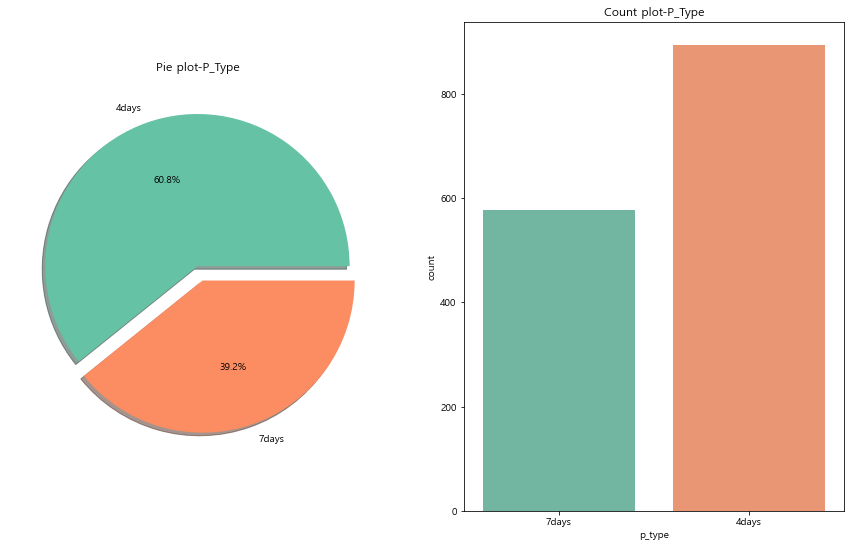

In [144]:
f, ax = plt.subplots(1,2, figsize = (15,9))
colors = sns.color_palette("Set2")

df_closet['p_type'].value_counts().plot.pie(explode = [0,0.1],autopct = '%1.1f%%',
        ax = ax[0], shadow = True, colors = colors)
ax[0].set_title('Pie plot-P_Type')
ax[0].set_ylabel('')
sns.countplot('p_type', data = df_closet, ax = ax[1], palette="Set2")
ax[1].set_title('Count plot-P_Type')

plt.show()

In [159]:
#p_type, app_yn 교차표, countplot

pd.crosstab(df_closet['p_type'], 
            df_closet['app_yn'], margins=True).style.background_gradient(cmap ='flare')

app_yn,N,Y,All
p_type,,,
4days,116,778,894
7days,60,517,577
All,176,1295,1471


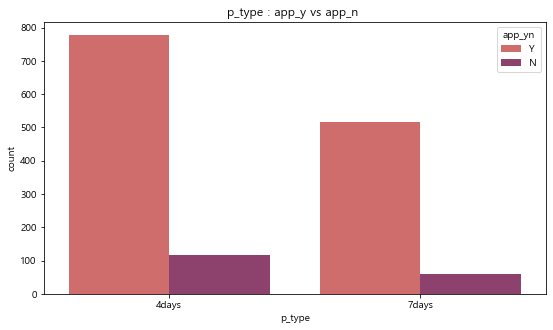

In [163]:
plt.figure(figsize=(9,5))
sns.countplot(x='p_type',hue = 'app_yn', data =df_closet, palette = "flare",
             order = df_closet['p_type'].value_counts().index)
plt.title('p_type : app_y vs app_n ')
plt.show()

In [169]:
#p_type, sub_type 교차표, countplot
pd.crosstab(df_closet['p_type'], 
            df_closet['sub_type'], margins=True).style.background_gradient(cmap ='crest')

sub_type,B,BA,D,O,T,TP,All
p_type,,,,,,,
4days,47,354,200,157,118,18,894
7days,11,338,61,110,46,11,577
All,58,692,261,267,164,29,1471


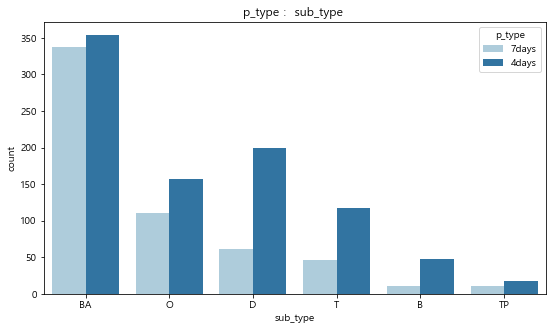

In [181]:
plt.figure(figsize=(9,5))
sns.countplot(x='sub_type',hue = 'p_type', data =df_closet, palette = "Paired",
             order = df_closet['sub_type'].value_counts().index)
plt.title('p_type :  sub_type ')
plt.show()

- 6:4 정도의 비율로 나눠지는 4days, 7days
- sub + app
    - 앱이 존재하는 경우가 사용량이 압도적
- sub + p
    - D, T,B 의 경우 4days가 7days의 두배가 넘는 수치
    - BA의 경우는 4days 나 7days의 차이가 상대적으로 미미하다
    

## order_date

In [183]:
df_closet

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn
0,Gucci,flower dionysus shoulder bag beige,a161237,2019-12-06,2021-01-15,7days,BA,Y
1,El estilo de Claire,beads cropped jacket black,a1140859,2021-01-02,2021-01-15,4days,O,N
2,Danha,embroidery point oriental mini skirt blue,a1140859,2021-01-02,2021-01-15,4days,B,N
3,Danha,graphics pattern top pink,a1140859,2021-01-02,2021-01-15,4days,T,N
4,Burberry London,buckle basic pattern zipup-jumper navy,a1140740,2021-01-01,2021-01-15,7days,O,Y
...,...,...,...,...,...,...,...,...
1466,Yves Saint Laurent,logo point clutch bag pink,a119721,2019-04-10,2021-03-01,7days,BA,Y
1467,Prada,saffiano lux M gray,a1146069,2021-02-11,2021-03-01,7days,BA,Y
1468,Burberry,basic pattern sweater beige,a1147848,2021-02-28,2021-03-01,7days,T,Y
1469,Chanel,graphics pattern sweat-shirts white,a1147788,2021-02-28,2021-03-01,7days,T,Y


order_date
2021-03-24    47
2021-03-17    42
2021-01-21    39
2021-03-31    37
2021-03-23    35
              ..
2021-01-09     2
2021-03-27     2
2021-02-20     1
2021-02-11     1
2021-01-02     1
Length: 90, dtype: int64


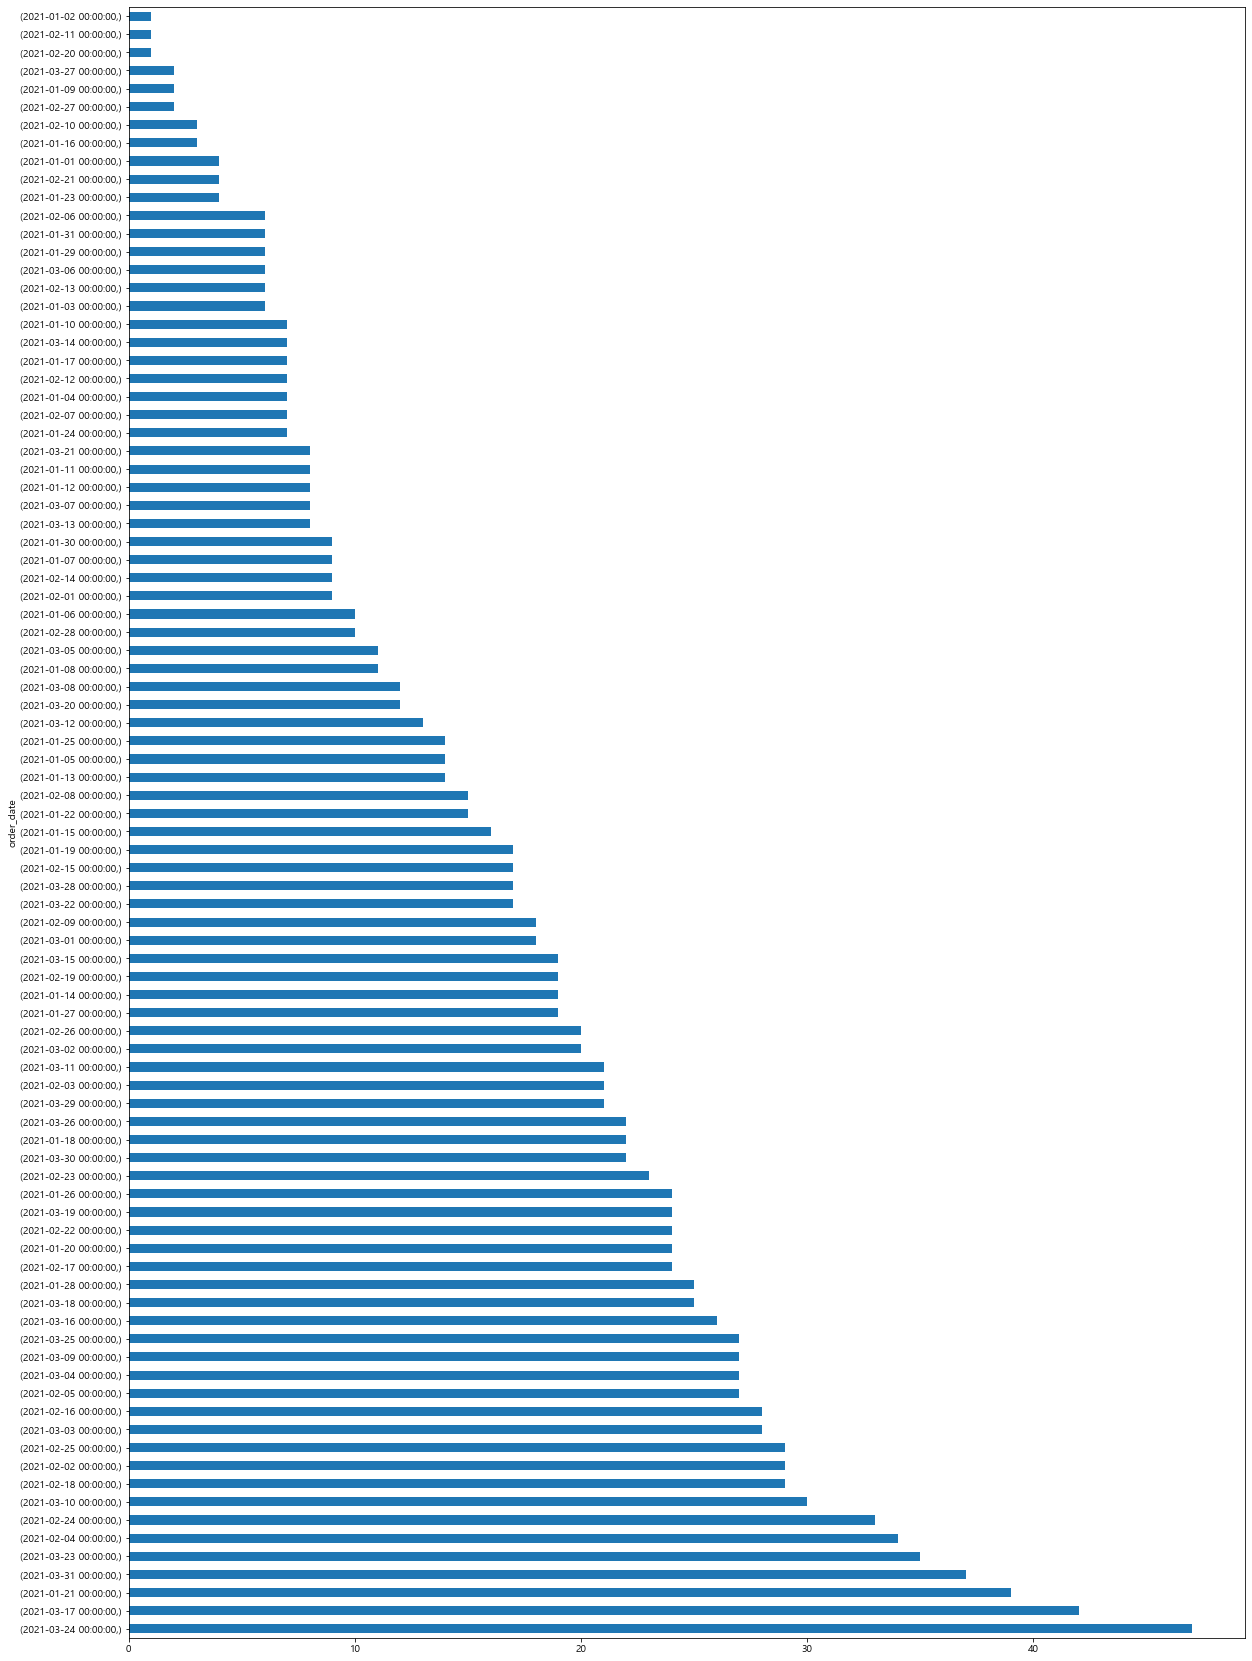

In [202]:
#날짜별 가장 많은 구매량을 기록한 날짜
plt.figure(figsize=(20,30))
df_closet.value_counts(['order_date']).plot(kind = 'barh')
print(df_closet.value_counts(['order_date']))

In [197]:
print(df_closet.value_counts(['order_date']).tail(15))

order_date
2021-03-06    6
2021-01-29    6
2021-01-31    6
2021-02-06    6
2021-01-23    4
2021-02-21    4
2021-01-01    4
2021-01-16    3
2021-02-10    3
2021-02-27    2
2021-01-09    2
2021-03-27    2
2021-02-20    1
2021-02-11    1
2021-01-02    1
dtype: int64


In [204]:
df_closet_date=df_closet.sort_values(['order_date'])

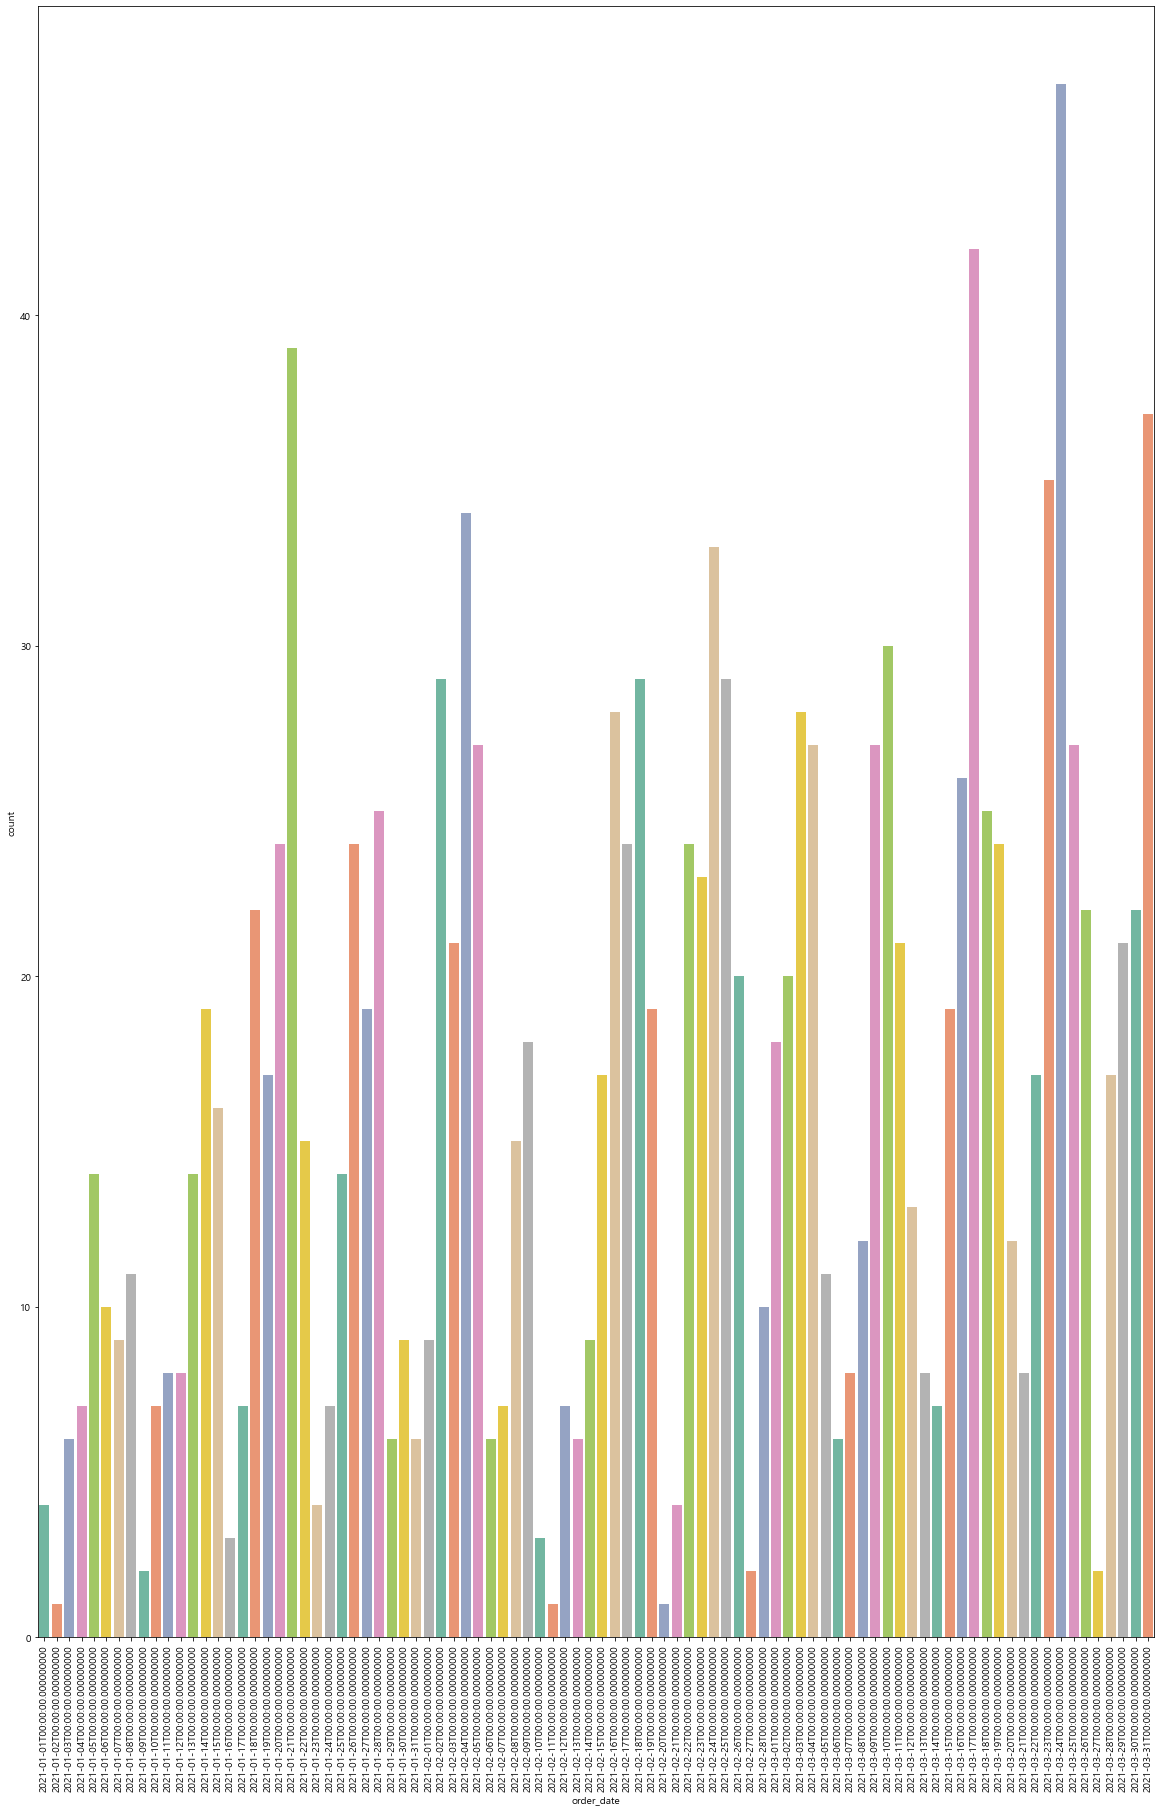

In [214]:
#유저 사용량 countplot
plt.figure(figsize=(20,30))
sns.countplot(x='order_date', data =df_closet_date, palette = "Set2")
plt.xticks(rotation = 'vertical')
plt.show()

<AxesSubplot:xlabel='order_date'>

<Figure size 1440x720 with 0 Axes>

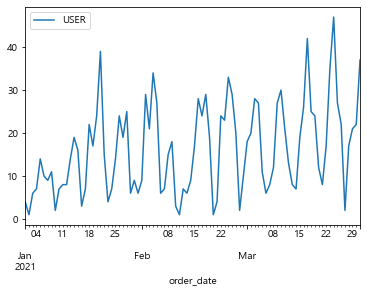

In [223]:
#유저 사용량 시계열
plt.figure(figsize=(20,10))
df_closet_date[['USER', 'order_date']].groupby(['order_date']).count().plot()

- cycle이 보이는거 같기도..?

In [227]:
#order_date 인덱스로 옮기자
df_closet_date.set_index('order_date', inplace=True)
df_closet_date

,brandnm,goodsnm,USER,reg_date,p_type,sub_type,app_yn
order_date,,,,,,,
2021-01-01,Chanel,pocket graphics pattern zipup-jumper navy,a1112031,2020-08-15,7days,O,N
2021-01-01,BCBG,pleats basic pattern H-Line dress deeppink,a196681,2020-04-17,4days,D,Y
2021-01-01,Baum Und Pferdgarten,geometric pattern A-Line dress purple,a196681,2020-04-17,4days,D,Y
2021-01-01,El estilo de Claire,beads stud velvet jacket black,a196681,2020-04-17,4days,O,Y
2021-01-02,Balmain,double button long coat white,a1140621,2020-12-31,7days,O,N
...,...,...,...,...,...,...,...
2021-03-31,Nain,wrap detail coat beige,a1151465,2021-03-31,7days,O,N
2021-03-31,Michaa,gather basic pattern H-Line dress green,a1144560,2021-01-26,4days,D,Y
2021-03-31,Gucci,GG supreme clutch brown,a1151499,2021-03-31,4days,BA,Y


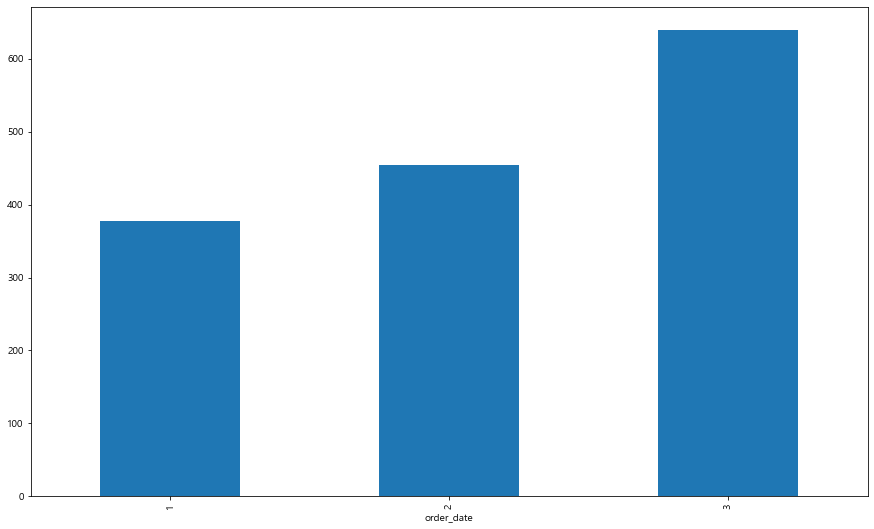

In [286]:
#month별 구매량 count
plt.figure(figsize=(15,9))
month_date = df_closet_date['USER'].groupby(df_closet_date.index.month).count()
month_date.plot(kind = 'bar')
plt.xtocls = weekday.index

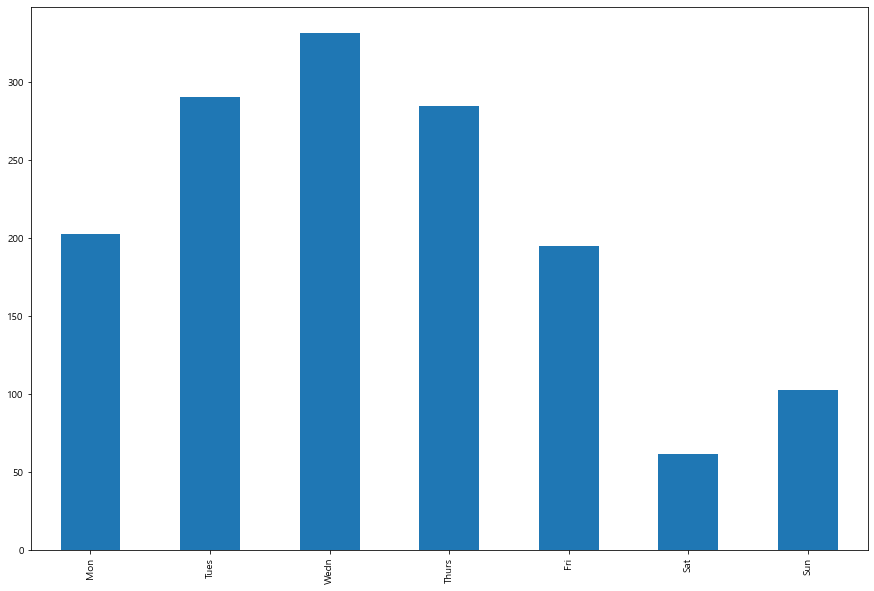

In [287]:
#요일별 유저 구매량
plt.figure(figsize=(15,10))
weekday = df_closet_date['USER'].groupby(df_closet_date.index.dayofweek).count()
weekday.index = ['Mon', 'Tues','Wedn','Thurs','Fri','Sat','Sun']
weekday.plot(kind = 'bar')
plt.xtocls = weekday.index


- 1월 부터 꾸준히 상승 중
- 화, 수, 목 주문량이 다른 요일에 비해 상대적으로 높다
- 3월달에 고점을 찍고 있지만 1월 21일이 3순위, 프로모션이나 이벤트를 진행했나..?
- 시계열 분석으로 추세를 더 보자

## user

In [262]:
print(df_closet['USER'].value_counts().head(15))
print(df_closet['USER'].value_counts().count())

a1149461    11
a1149583    10
a1142677     9
a1143701     7
a189404      7
a1149542     6
a187924      6
a1129550     6
a1140758     5
a1139388     4
a157879      4
a1149258     4
a1142679     4
a1144535     4
a1139028     4
Name: USER, dtype: int64
1234


<AxesSubplot:>

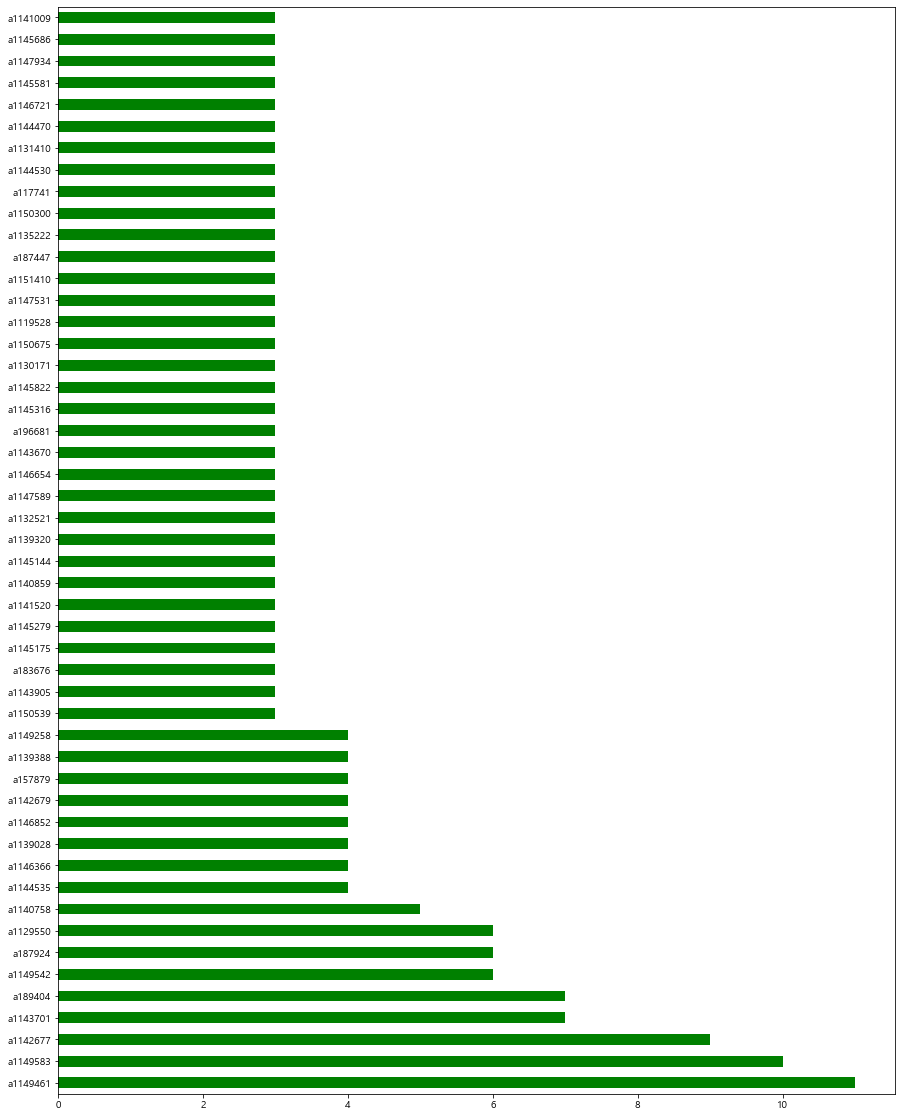

In [285]:
f, axs = plt.subplots(1,1, figsize = (15,20))
df_closet['USER'].value_counts().sort_values(ascending = False)[:50].plot(kind = 'barh',
                                                                            color = ['green'])
